# Cylistic - A Case Study

## Introduction

This case study was created by Dama D. Daliman (a.k.a RunningPie) as part of the Google Data Analytics Course (https://www.coursera.org/professional-certificates/analitik-data-google) learning series. The objectives and expected benefits of working on this case study are as follows:

1. Utilize the knowledge gained from the Google Data Analytics Course in a business case that closely resembles reality.

2. Deepen data analysis skills.

3. Become more familiar with the tools and domain knowledge required to analyze data related to business needs.

Disclaimer: The scenario and characters in this case study are purely fictional. Any resemblance to real-world scenarios or individuals is purely coincidental. The data used is obtained from real companies through proper and lawful means.

## Scenario

You are a junior data analyst working in the marketing analytics team at Cyclistic, a bike-sharing company in Chicago. The marketing director believes that the company's future success relies on efforts to maximize the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members utilize Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert regular riders into annual members. However, first, the Cyclistic executives need to approve your recommendations, so the recommendations must be supported by compelling data insights and professional data visualizations.

## About The Company

In 2016, Cyclistic launched a successful bike-sharing program. Since then, the program has grown to a fleet of 5,824 geographically tracked bikes, locked into a network of 692 stations across Chicago. Bikes can be accessed from one station and returned to any other station within the system.

To date, Cyclistic's marketing strategy has relied on efforts to build general awareness and attract a broad consumer segment. One approach that has helped achieve this is pricing flexibility: one-way tickets, full-day passes, and annual memberships. Customers who purchase one-way tickets or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Cyclistic's financial analysts have concluded that annual members are much more profitable than regular riders. While pricing flexibility has helped Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be the key to future growth. Instead of creating marketing campaigns targeting new customers, Moreno believes there is an opportunity to convert regular riders into members. He notes that casual riders are already familiar with the Cyclistic program and have chosen Cyclistic for their mobility needs.

Moreno has set clear goals: designing a marketing strategy aimed at converting regular riders into annual members. However, to do so, the marketing analytics team needs a deeper understanding of the differences between annual members and regular riders, why riders would be willing to purchase memberships, and how digital media can influence their marketing tactics. Moreno and his team are interested in analyzing Cyclistic's bike trip data to identify trends.

## Ask

●	What is the problem that you are trying to solve?

What is the best marketing strategy to convert casual users into annual members? => How does annual members use the service differently from casual users?

●	Bagaimana wawasan Anda dapat mendorong keputusan bisnis? How will your insight support the business decision?

By understanding how annual members use the service differently from casual users, Moreno will be able to devise an approptriate marketing strategy to convert casual users into annual members.

So, the business task defined is:
Perform analysis on the travel or service usage data to segment customers and determine the best marketing strategy to convert casual users into annual members

## Prepare

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_stations_2017Q1Q2 = pd.read_csv("./Divvy_Trips_2017/Divvy_Stations_2017_Q1Q2.csv")
dataset_stations_2017Q3Q4 = pd.read_csv("./Divvy_Trips_2017/Divvy_Stations_2017_Q3Q4.csv")
dataset_2017Q1 = pd.read_csv("./Divvy_Trips_2017/Divvy_Trips_2017_Q1.csv")
dataset_2017Q2 = pd.read_csv("./Divvy_Trips_2017/Divvy_Trips_2017_Q2.csv")
dataset_2017Q3 = pd.read_csv("./Divvy_Trips_2017/Divvy_Trips_2017_Q3.csv")
dataset_2017Q4 = pd.read_csv("./Divvy_Trips_2017/Divvy_Trips_2017_Q4.csv")

In [3]:
dataset_2017 = pd.concat([dataset_2017Q1, dataset_2017Q2, dataset_2017Q3, dataset_2017Q4])

dataset_2017

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0
1,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0
2,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0
3,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0
4,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0
...,...,...,...,...,...,...,...,...,...,...,...,...
669234,16734070,10/1/2017 0:01,10/1/2017 0:15,1099,837,289,Wells St & Concord Ln,226,Racine Ave & Belmont Ave,Subscriber,Male,1991.0
669235,16734069,10/1/2017 0:00,10/1/2017 0:07,3688,366,45,Michigan Ave & Congress Pkwy,52,Michigan Ave & Lake St,Customer,NaN,NaN
669236,16734068,10/1/2017 0:00,10/1/2017 0:05,1416,264,520,Greenview Ave & Jarvis Ave,447,Glenwood Ave & Morse Ave,Customer,NaN,NaN
669237,16734067,10/1/2017 0:00,10/1/2017 0:06,5396,361,288,Larrabee St & Armitage Ave,289,Wells St & Concord Ln,Subscriber,Female,1984.0


In [4]:
dataset_stations_2017 = dataset_stations_2017Q3Q4

dataset_stations_2017

,id,name,city,latitude,longitude,dpcapacity,online_date,Unnamed: 7
0,2,Buckingham Fountain,Chicago,41.876393,-87.620328,27,6/10/2013 10:43,NaN
1,3,Shedd Aquarium,Chicago,41.867226,-87.615355,55,6/10/2013 10:44,NaN
2,4,Burnham Harbor,Chicago,41.856268,-87.613348,23,6/10/2013 10:46,NaN
3,5,State St & Harrison St,Chicago,41.874053,-87.627716,23,6/10/2013 10:46,NaN
4,6,Dusable Harbor,Chicago,41.885041,-87.612794,39,6/10/2013 11:18,NaN
...,...,...,...,...,...,...,...,...
580,622,California Ave & Cortez St,Chicago,41.900363,-87.696704,15,4/27/2017 9:17,NaN
581,623,Michigan Ave & 8th St,Chicago,41.872773,-87.623981,31,6/13/2017 15:23,NaN
582,624,Dearborn St & Van Buren St (*),Chicago,41.876268,-87.629155,16,7/26/2017 21:25,NaN
583,625,Chicago Ave & Dempster St,Evanston,42.041691,-87.680687,15,8/11/2017 16:53,NaN


The dataset was obtained through the online link: https://divvy-tripdata.s3.amazonaws.com/index.html and stored locally.

Note: The dataset has different names because Cyclistic is a fictional company. For the purposes of this case study, the dataset provided is appropriate and will allow us to answer the business questions. The data has been provided by Motivate International Inc. with the following license agreement: https://www.divvybikes.com/data-license-agreement.

From the stations dataset for the 3rd quarter (Q3) and 4th quarter (Q4) of 2017, it can be seen that this data was taken from the state of Illinois as it contains data from cities like Chicago and Evanston.

**How is the data organized?**

The data is in CSV format and divided into 6 separate CSV files: Station data for the 1st (Q1) and 2nd (Q2) quarters of 2017, station data for the 3rd (Q3) and 4th (Q4) quarters of 2017, trip/transaction data for the 1st (Q1) quarter of 2017, trip/transaction data for the 2nd (Q2) quarter of 2017, trip/transaction data for the 3rd (Q3) quarter of 2017, and trip/transaction data for the 4th (Q4) quarter of 2017.

The Q1 and Q2 station data have 582 rows and 7 columns, including: id, name, latitude, longitude, dpcapacity, and online_date.

The Q3 and Q4 station data have the same columns but with a total of 586 rows.

The Q1 trip data has 431,691 rows and 12 columns: trip_id, start_time, stop_time, bikeid, tripduration, from_station_name, to_station_name, from_station_id, to_station_id, usertype, gender, and birthyear.

The Q2, Q3, and Q4 trip data have the same columns but with 1,119,814, 1,608,270, and 669,239 rows, respectively.

Then, the data used in this analysis is the trip/transaction data from Q1 to Q4 in 2017, which is combined into one dataframe and stored in the variable "dataset_2017" with dimensions of 3,829,014 rows × 12 columns.

**Is the data ROCCC?**

Reliability: The data is obtained from a reliable source (Divvy Bikes), which can be identified through data completeness, data structure, and metadata information provided in the readme file.

Originality: The data obtained is from an original source, as indicated by the provided readme file.

Currency: The data used is from the year 2017 and is the most recent data that aligns with the analysis requirements for the following reasons:

1. Based on the case study conducted, Cyclistic began operations in 2016, so analyzing data from 2017 is still valid.

2. The most recent data available, organized by quarters and with clear readme documentation, is from 2017.

Comprehensiveness: The provided readme file indicates that the dataset has relevant dimensions and variables for the analysis objectives.

Credibility: The data is obtained from a credible source (Divvy Bikes).

**How about licensing, privacy, security, and accessibility?**

Data licensing has been granted based on the previous note that "Data has been provided by Motivate International Inc. under the following license: https://www.divvybikes.com/data-license-agreement."

User privacy in the data is ensured because, according to Divvy Bikes' privacy policy, personally identifiable information of riders is not exposed in this dataset.

**Are there issues with the data?**

In [5]:
# checking the numerical data
dataset_2017.describe()

,trip_id,bikeid,tripduration,from_station_id,to_station_id,birthyear
count,3.829014e+06,3.829014e+06,3.829014e+06,3.829014e+06,3.829014e+06,2.992256e+06
mean,1.527218e+07,3.425115e+03,9.556339e+02,1.803509e+02,1.805161e+02,1.981586e+03
std,1.302950e+06,1.861236e+03,1.569451e+03,1.328194e+02,1.329273e+02,1.088278e+01
min,1.297923e+07,1.000000e+00,6.000000e+01,2.000000e+00,2.000000e+00,1.899000e+03
25%,1.416006e+07,1.803000e+03,4.020000e+02,7.400000e+01,7.400000e+01,1.976000e+03
50%,1.527486e+07,3.583000e+03,6.860000e+02,1.560000e+02,1.560000e+02,1.985000e+03
75%,1.639615e+07,5.063000e+03,1.149000e+03,2.680000e+02,2.680000e+02,1.990000e+03
max,1.753670e+07,6.471000e+03,8.633800e+04,6.260000e+02,6.260000e+02,2.017000e+03


From the summary above, there appears to be an issue with the numerical data, specifically the birthyear data. The count of data for birthyear is not consistent with the other data, indicating the presence of some users with unknown birth years. Additionally, the maximum value for birthyear is also listed as 2017, which seems unreasonable.

In [6]:
# checking the categorical data
dataset_2017.describe(include="object")

,start_time,end_time,from_station_name,to_station_name,usertype,gender
count,3829014,3829014,3829014,3829014,3829014,2992187
unique,2823388,2736001,593,593,3,2
top,10/9/2017 17:16,10/19/2017 17:39,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Subscriber,Male
freq,66,58,97571,106023,2992135,2245550


From the count and unique data, there appear to be inconsistencies. In the "usertype" column, there are three types, whereas the metadata in the readme only mentions two types: "customer" and "subscriber." Additionally, the gender data is incomplete. Further examination of these two columns is needed.

From the two data summaries above, there are several points to consider:

1. The "birthyear" column has missing data, indicated by the lower count compared to other columns.

2. The maximum value in the "birthyear" column is listed as the year 2017, which seems unreasonable and requires further investigation.

3. The "usertype" column shows three types, while the metadata in the readme only mentions two types.

4. The "gender" column has incomplete data as the count is lower than other columns.

Due to these three issues, further examination is needed.

In [7]:
# checking for NaN values in the birthyear column
dataset_2017["birthyear"].isna().sum()

836758

In [8]:
# calculating the percentage of NaN data contributed by the birthyear column
print(round(dataset_2017["birthyear"].isna().sum()/len(dataset_2017)*100), "%")

22 %


In [9]:
# checking how many data entries which birthyear values are above 2000
dataset_2017.loc[dataset_2017["birthyear"]>2000]["birthyear"].value_counts()

2001.0    359
2003.0    182
2002.0     59
2016.0     46
2004.0     31
2017.0      7
Name: birthyear, dtype: int64

In [10]:
# checking the details for entries with birth years above 2010
dataset_2017.loc[dataset_2017["birthyear"]>2010]

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
7687,13509322,3/30/2017 09:22:04,3/30/2017 10:44:31,5275,4947,436,Fairfield Ave & Roosevelt Rd,436,Fairfield Ave & Roosevelt Rd,Subscriber,Male,2016.0
33625,13477025,3/24/2017 17:11:41,3/24/2017 17:33:13,2117,1292,436,Fairfield Ave & Roosevelt Rd,436,Fairfield Ave & Roosevelt Rd,Subscriber,Male,2016.0
98513,13395845,3/10/2017 17:34:29,3/10/2017 17:52:16,1590,1067,439,Kedzie Ave & 21st St,436,Fairfield Ave & Roosevelt Rd,Subscriber,Male,2016.0
189262,13285096,2/22/2017 12:52:42,2/22/2017 13:15:42,5680,1380,436,Fairfield Ave & Roosevelt Rd,436,Fairfield Ave & Roosevelt Rd,Subscriber,Male,2016.0
235327,13232278,2/18/2017 09:32:11,2/18/2017 09:57:27,5680,1516,436,Fairfield Ave & Roosevelt Rd,436,Fairfield Ave & Roosevelt Rd,Subscriber,Male,2016.0
412831,13004738,1/8/2017 14:30:23,1/8/2017 14:35:16,4356,293,435,Kedzie Ave & Roosevelt Rd,436,Fairfield Ave & Roosevelt Rd,Subscriber,Male,2016.0
412872,13004656,1/8/2017 14:09:22,1/8/2017 14:15:45,1298,383,436,Fairfield Ave & Roosevelt Rd,435,Kedzie Ave & Roosevelt Rd,Subscriber,Male,2016.0
742070,13980163,5/13/2017 10:14:42,5/13/2017 10:46:28,4136,1906,436,Fairfield Ave & Roosevelt Rd,436,Fairfield Ave & Roosevelt Rd,Subscriber,Male,2016.0
814561,13890082,5/5/2017 14:00:41,5/5/2017 14:19:33,2474,1132,436,Fairfield Ave & Roosevelt Rd,436,Fairfield Ave & Roosevelt Rd,Subscriber,Male,2016.0
814859,13889748,5/5/2017 13:09:46,5/5/2017 13:20:25,2474,639,436,Fairfield Ave & Roosevelt Rd,436,Fairfield Ave & Roosevelt Rd,Subscriber,Male,2016.0


In [11]:
# Calculating how many user types are in the usertype column and each of their occurences
dataset_2017["usertype"].value_counts()

Subscriber    2992135
Customer       836872
Dependent           7
Name: usertype, dtype: int64

In [12]:
sum(dataset_2017["usertype"].value_counts().values)

3829014

In [13]:
# checking the details for "Dependent" user types
dataset_2017.loc[dataset_2017["usertype"]=="Dependent"]

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
137180,13349140,3/4/2017 13:26:20,3/4/2017 13:43:25,2569,1025,207,Emerald Ave & 28th St,207,Emerald Ave & 28th St,Dependent,Male,1979.0
166021,13313514,2/27/2017 07:02:01,2/27/2017 07:06:05,706,244,207,Emerald Ave & 28th St,206,Halsted St & Archer Ave,Dependent,Male,1979.0
235830,13231738,2/18/2017 07:47:21,2/18/2017 07:52:32,4576,311,207,Emerald Ave & 28th St,206,Halsted St & Archer Ave,Dependent,Male,1979.0
361830,13070858,1/22/2017 08:14:54,1/22/2017 08:18:51,3190,237,207,Emerald Ave & 28th St,206,Halsted St & Archer Ave,Dependent,Male,1979.0
814609,15777515,8/13/2017 13:05:00,8/13/2017 13:18:24,3570,804,177,Theater on the Lake,327,Sheffield Ave & Webster Ave,Dependent,NaN,1973.0
815467,15776556,8/13/2017 12:35:43,8/13/2017 13:04:52,3570,1749,177,Theater on the Lake,177,Theater on the Lake,Dependent,NaN,1973.0
815870,15776123,8/13/2017 12:20:38,8/13/2017 12:35:31,3570,893,327,Sheffield Ave & Webster Ave,177,Theater on the Lake,Dependent,NaN,1973.0


In [14]:
# Checking the unique categories for the gender column and calculating their occurences
dataset_2017["gender"].value_counts()

Male      2245550
Female     746637
Name: gender, dtype: int64

In [15]:
sum(dataset_2017["gender"].value_counts().values)

2992187

In [16]:
# checking for NaN values in the gender column
dataset_2017["gender"].isna().sum()

836827

In [17]:
# calculating the NaN value percentage contributed from the gender column
print(round(dataset_2017["gender"].isna().sum()/len(dataset_2017)*100), "%")

22 %


In [18]:
# Checking for duplicates
dataset_2017.duplicated().value_counts()

False    3829003
True          11
dtype: int64

In [19]:
# Checking the details of the duplicate data
dataset_2017['duplicated'] = dataset_2017.duplicated()
dataset_2017.loc[dataset_2017["duplicated"] == True]

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,duplicated
838298,13859842,5/2/2017 18:57:11,5/2/2017 19:08:21,2152,670,283,LaSalle St & Jackson Blvd,181,LaSalle St & Illinois St,Customer,NaN,NaN,True
840390,13857400,5/2/2017 16:45:56,5/2/2017 16:55:02,5170,546,181,LaSalle St & Illinois St,49,Dearborn St & Monroe St,Customer,NaN,NaN,True
841418,13856026,5/2/2017 14:44:49,5/2/2017 15:04:39,5170,1190,210,Ashland Ave & Division St,181,LaSalle St & Illinois St,Customer,NaN,NaN,True
912868,13766560,4/23/2017 16:42:51,4/23/2017 17:00:54,78,1083,35,Streeter Dr & Grand Ave,141,Clark St & Lincoln Ave,Customer,NaN,NaN,True
912876,13766552,4/23/2017 16:42:33,4/23/2017 17:01:40,3596,1147,35,Streeter Dr & Grand Ave,141,Clark St & Lincoln Ave,Customer,NaN,NaN,True
915369,13763856,4/23/2017 14:48:50,4/23/2017 15:12:17,2152,1407,76,Lake Shore Dr & Monroe St,99,Lake Shore Dr & Ohio St,Customer,NaN,NaN,True
915383,13763843,4/23/2017 14:48:29,4/23/2017 15:12:41,3687,1452,76,Lake Shore Dr & Monroe St,99,Lake Shore Dr & Ohio St,Customer,NaN,NaN,True
915798,13763403,4/23/2017 14:30:30,4/23/2017 14:47:13,3620,1003,4,Burnham Harbor,76,Lake Shore Dr & Monroe St,Customer,NaN,NaN,True
915818,13763383,4/23/2017 14:29:58,4/23/2017 14:47:19,5723,1041,4,Burnham Harbor,76,Lake Shore Dr & Monroe St,Customer,NaN,NaN,True
916500,13762620,4/23/2017 13:57:00,4/23/2017 14:27:30,4435,1830,267,Lake Park Ave & 47th St,4,Burnham Harbor,Customer,NaN,NaN,True


In [20]:
# checking the datatypes of each column
dataset_2017.dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration           int64
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
duplicated              bool
dtype: object

It can be observed from the code snippets above that:

1. There are quite a number of users with unknown birth years, amounting to 836,758 users. However, this only accounts for approximately 22% of the overall data.

2. There are 53 entries of users born after the year 2010, specifically 46 born in 2016 and 7 born in 2017. This data seems unreasonable considering the trips were conducted in 2017, and all entries born after 2010 are annual members.

3. There is a user type called "dependent" which, based on transaction behavior (trip duration, start station, and end station) and user identity (gender and birth year), indicates that these dependent users are actually one-time ticket purchasers.

4. There are quite a number of users with unknown gender, amounting to 836,827 users. However, this only accounts for approximately 22% of the overall data.

5. There are 11 duplicate entries.

6. The data type of "start_time" and "end_time" should be in datetime format, and the "birthyear" should be stored as an integer.

## Process

**Selected Tool**

The tool used for data processing here is the Python programming language via Jupyter Notebook, utilizing data processing libraries such as NumPy, Pandas, and scikit-learn. These tools were chosen because:

1. Familiarity with data processing in Python: Python is widely used in data processing tasks and offers extensive libraries and resources for working with data.

2. Easy integration with various text editors: Python can be seamlessly integrated with different text editors and development environments, allowing for a flexible and personalized coding experience.

3. Adequate data processing libraries: Python provides powerful libraries such as NumPy for numerical computations, Pandas for data manipulation and analysis, and scikit-learn for machine learning tasks. These libraries offer comprehensive functionality for data processing requirements.

4. Notebook capabilities: Jupyter Notebook allows for the combination of documentation (markup) and code in a single environment. It facilitates the creation of interactive and reproducible data analysis workflows, making it convenient for documenting and sharing data processing steps.

**Steps taken to cleanse the data**

Next, what needs to be done regarding the data issues in the "prepare" section above?

1. The "dependent" and "customer" user types can be merged because the focus of the analysis is the difference between one-time users and 24-hour pass users compared to annual members. The "dependent" and "customer" types can be combined into a new type called "casual."

2. Users with unknown gender or birth year (NaN) can be removed since they only account for approximately 22% of the total data.

3. Users born after the year 2010 can be removed as it is both unrealistic and represents a small portion of the overall data.

4. Duplicate data can be disregarded as it may contain unknown gender and/or birth year, and will be removed accordingly.

5. The data types of "start_time" and "end_time" will be converted to datetime, and the "birthyear" data will be converted to integer.

In [21]:
# Converting Customer usertype and Dependent usertype to Casual usertype
dataset_2017["usertype"] = dataset_2017["usertype"].replace("Customer", "Casual")
dataset_2017["usertype"] = dataset_2017["usertype"].replace("Dependent", "Casual")
dataset_2017["usertype"].value_counts()

Subscriber    2992135
Casual         836879
Name: usertype, dtype: int64

In [22]:
# deleting data (gender or birth year) which contains NaN values
dataset_2017.dropna(axis=0, inplace=True)
dataset_2017.describe(include="object")

,start_time,end_time,from_station_name,to_station_name,usertype,gender
count,2991940,2991940,2991940,2991940,2991940,2991940
unique,2230963,2208430,592,592,2,2
top,10/2/2017 17:07,10/19/2017 17:39,Canal St & Adams St,Canal St & Adams St,Subscriber,Male
freq,56,57,48924,50824,2991082,2245305


In [23]:
# dropping the "duplicated" column which was used to clean the duplicate data
dataset_2017.drop("duplicated", axis=1, inplace=True)

In [24]:
# type casting start_time into datetime
dataset_2017["start_time"] = pd.to_datetime(dataset_2017["start_time"])

In [25]:
# type casting end_time into datetime
dataset_2017["end_time"] = pd.to_datetime(dataset_2017["end_time"])

In [26]:
# type casting birthyear data into integer
dataset_2017["birthyear"] = dataset_2017["birthyear"].astype(np.int64)

In [27]:
# dropping data which has birthyear over 2010
dataset_2017 = dataset_2017[dataset_2017.birthyear<2010]

Now it can be seen that the count of each column is the same, the usertype is specified to only have two types, the data types of the start_time, end_time, and birthyear columns are correct, and the unrealistic birth year data has been filtered out.

**How to verify that the data is clean and ready to analyze?**

In [28]:
dataset_2017

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,13518905,2017-03-31 23:59:07,2017-04-01 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989
1,13518904,2017-03-31 23:56:25,2017-04-01 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990
2,13518903,2017-03-31 23:55:33,2017-04-01 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979
3,13518902,2017-03-31 23:54:46,2017-03-31 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985
4,13518901,2017-03-31 23:53:33,2017-04-01 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989
...,...,...,...,...,...,...,...,...,...,...,...,...
669232,16734072,2017-10-01 00:01:00,2017-10-01 00:12:00,3866,664,220,Hampden Ct & Diversey Pkwy,87,Racine Ave & Fullerton Ave,Subscriber,Female,1994
669233,16734071,2017-10-01 00:01:00,2017-10-01 00:12:00,88,662,220,Hampden Ct & Diversey Pkwy,87,Racine Ave & Fullerton Ave,Subscriber,Male,1993
669234,16734070,2017-10-01 00:01:00,2017-10-01 00:15:00,1099,837,289,Wells St & Concord Ln,226,Racine Ave & Belmont Ave,Subscriber,Male,1991
669237,16734067,2017-10-01 00:00:00,2017-10-01 00:06:00,5396,361,288,Larrabee St & Armitage Ave,289,Wells St & Concord Ln,Subscriber,Female,1984


In [29]:
# verifying statistic and descriptive information summary from all the columns
dataset_2017.describe(include="all")

C:\Users\Dama\AppData\Local\Temp\ipykernel_23836\2396843109.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataset_2017.describe(include="all")
C:\Users\Dama\AppData\Local\Temp\ipykernel_23836\2396843109.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataset_2017.describe(include="all")


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
count,2.991887e+06,2991887,2991887,2.991887e+06,2.991887e+06,2.991887e+06,2991887,2.991887e+06,2991887,2991887,2991887,2.991887e+06
unique,NaN,2230917,2208388,NaN,NaN,NaN,592,NaN,592,2,2,NaN
top,NaN,2017-10-02 17:07:00,2017-10-19 17:39:00,NaN,NaN,NaN,Canal St & Adams St,NaN,Canal St & Adams St,Subscriber,Male,NaN
freq,NaN,56,57,NaN,NaN,NaN,48924,NaN,50824,2991029,2245252,NaN
first,NaN,2017-01-01 00:02:54,2017-01-01 00:08:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-12-31 23:58:00,2018-01-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.528658e+07,NaN,NaN,3.458717e+03,7.036071e+02,1.867627e+02,NaN,1.870161e+02,NaN,NaN,NaN,1.981585e+03
std,1.359136e+06,NaN,NaN,1.871196e+03,9.516233e+02,1.314238e+02,NaN,1.317156e+02,NaN,NaN,NaN,1.088246e+01
min,1.297923e+07,NaN,NaN,1.000000e+00,6.000000e+01,2.000000e+00,NaN,2.000000e+00,NaN,NaN,NaN,1.899000e+03
25%,1.407260e+07,NaN,NaN,1.831000e+03,3.560000e+02,7.700000e+01,NaN,7.700000e+01,NaN,NaN,NaN,1.976000e+03


In [30]:
# verifying data completeness 
dataset_2017.isna().sum()

trip_id              0
start_time           0
end_time             0
bikeid               0
tripduration         0
from_station_id      0
from_station_name    0
to_station_id        0
to_station_name      0
usertype             0
gender               0
birthyear            0
dtype: int64

In [31]:
# checking for duplicate data
dataset_2017.duplicated().value_counts()

False    2991887
dtype: int64

In [32]:
# checking each column data types
dataset_2017.dtypes

trip_id                       int64
start_time           datetime64[ns]
end_time             datetime64[ns]
bikeid                        int64
tripduration                  int64
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                     int64
dtype: object

The four code snippets above proves that:
1. All the columns have the same data count

2. All the columns are already free of NaN values

3. There are no more duplicate data entries

4. All the data types are appropriate

**Processing**

In [33]:
# creating "day_of_week" column to expand analysis capability
dataset_2017["day_of_week"] = dataset_2017["start_time"].dt.strftime('%A')

C:\Users\Dama\AppData\Local\Temp\ipykernel_23836\1199175028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2017["day_of_week"] = dataset_2017["start_time"].dt.strftime('%A')


In [34]:
# sorting the "day_of_week" values so it starts from Sunday and ends on Saturday
dataset_2017['day_of_week'] = pd.Categorical(dataset_2017['day_of_week'],
                                             categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                                                         'Thursday', 'Friday', 'Saturday'],
                                             ordered=True)

C:\Users\Dama\AppData\Local\Temp\ipykernel_23836\1635001329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2017['day_of_week'] = pd.Categorical(dataset_2017['day_of_week'],


In [35]:
# checking for the value counts of each day in day_of_week column
dataset_2017["day_of_week"].value_counts()

Tuesday      501029
Thursday     482083
Wednesday    481026
Monday       472135
Friday       458154
Saturday     306375
Sunday       291085
Name: day_of_week, dtype: int64

## Analyzing

**Descriptive Analysis**

In [36]:
dataset_2017.describe(include="all")

C:\Users\Dama\AppData\Local\Temp\ipykernel_23836\4240647820.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataset_2017.describe(include="all")
C:\Users\Dama\AppData\Local\Temp\ipykernel_23836\4240647820.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataset_2017.describe(include="all")


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,day_of_week
count,2.991887e+06,2991887,2991887,2.991887e+06,2.991887e+06,2.991887e+06,2991887,2.991887e+06,2991887,2991887,2991887,2.991887e+06,2991887
unique,NaN,2230917,2208388,NaN,NaN,NaN,592,NaN,592,2,2,NaN,7
top,NaN,2017-10-02 17:07:00,2017-10-19 17:39:00,NaN,NaN,NaN,Canal St & Adams St,NaN,Canal St & Adams St,Subscriber,Male,NaN,Tuesday
freq,NaN,56,57,NaN,NaN,NaN,48924,NaN,50824,2991029,2245252,NaN,501029
first,NaN,2017-01-01 00:02:54,2017-01-01 00:08:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-12-31 23:58:00,2018-01-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.528658e+07,NaN,NaN,3.458717e+03,7.036071e+02,1.867627e+02,NaN,1.870161e+02,NaN,NaN,NaN,1.981585e+03,NaN
std,1.359136e+06,NaN,NaN,1.871196e+03,9.516233e+02,1.314238e+02,NaN,1.317156e+02,NaN,NaN,NaN,1.088246e+01,NaN
min,1.297923e+07,NaN,NaN,1.000000e+00,6.000000e+01,2.000000e+00,NaN,2.000000e+00,NaN,NaN,NaN,1.899000e+03,NaN
25%,1.407260e+07,NaN,NaN,1.831000e+03,3.560000e+02,7.700000e+01,NaN,7.700000e+01,NaN,NaN,NaN,1.976000e+03,NaN


In [37]:
dataset_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2991887 entries, 0 to 669238
Data columns (total 13 columns):
 #   Column             Dtype         
---  ------             -----         
 0   trip_id            int64         
 1   start_time         datetime64[ns]
 2   end_time           datetime64[ns]
 3   bikeid             int64         
 4   tripduration       int64         
 5   from_station_id    int64         
 6   from_station_name  object        
 7   to_station_id      int64         
 8   to_station_name    object        
 9   usertype           object        
 10  gender             object        
 11  birthyear          int64         
 12  day_of_week        category      
dtypes: category(1), datetime64[ns](2), int64(6), object(4)
memory usage: 299.6+ MB


From the code snippets above, we can obtain the following descriptive information:

1. The first recorded trip start date is on January 1, 2017.

2. The last recorded trip start date is on December 31, 2017.

3. The fastest trip duration is 60 seconds, while the longest trip duration is 86,096 seconds.

4. The most frequently visited station is the "Canal St & Adams St" station, with a total of 50,824 trips to that station.

5. The majority of users are "Subscribers" or annual members, with a total of 2,991,082 trips made by annual members.

6. Male customers account for the majority of trips, with a total of 2,245,305 trips made by male customers.

7. The youngest customer was born in 2004, while the oldest customer was born in 1899.

**Calculations**

In [38]:
# finding the mean of trip durations
mean_duration = dataset_2017["tripduration"].mean()
print(f"Average trip duration is: {round(mean_duration)} seconds")
print(f"or equivalent to {round(mean_duration/60)} minutes")

Average trip duration is: 704 seconds
or equivalent to 12 minutes


In [39]:
# finding the longest trip
max_duration = dataset_2017["tripduration"].max()
print(f"The longest trip duration is {round(max_duration)} seconds\nor equivalent to {round(max_duration/60)} minutes")

The longest trip duration is 86096 seconds
or equivalent to 1435 minutes


In [40]:
# finding the day in which the service is most used overall
mode_day = dataset_2017["day_of_week"].mode().values
print(f"Users mostly use the service on: {mode_day[0]}")

Users mostly use the service on: Tuesday


In [41]:
# Finding the average trip duration from annual members
subs_avg_duration = (dataset_2017.loc[dataset_2017["usertype"]=="Subscriber"])["tripduration"].mean()
print(f"Annual members average trip duration is: {round(subs_avg_duration)} seconds\nor equivalent to {round(subs_avg_duration/60)} minutes")

Annual members average trip duration is: 704 seconds
or equivalent to 12 minutes


In [42]:
# average trip duration of casual users
cas_avg_duration = (dataset_2017.loc[dataset_2017["usertype"]=="Casual"])["tripduration"].mean()
print(f"Casual users average trip duration is: {round(cas_avg_duration)} seconds\nor equivalent to {round(cas_avg_duration/60)} minutes")

Casual users average trip duration is: 997 seconds
or equivalent to 17 minutes


In [43]:
# the average trip duration for each day of the week
dur_per_day = dataset_2017.groupby(by="day_of_week")["tripduration"].mean().sort_index()
dur_per_day

day_of_week
Sunday       776.903726
Monday       688.771775
Tuesday      690.920160
Wednesday    676.958584
Thursday     678.043387
Friday       684.919926
Saturday     787.586667
Name: tripduration, dtype: float64

Users trip duration, on average, is longer on the weekends (Saturday dan Sunday)

In [44]:
# amount of trips done in each day of the week
trip_per_day = dataset_2017.groupby(by="day_of_week")["trip_id"].count().sort_index()
trip_per_day

day_of_week
Sunday       291085
Monday       472135
Tuesday      501029
Wednesday    481026
Thursday     482083
Friday       458154
Saturday     306375
Name: trip_id, dtype: int64

Trips are mostly done on Tuesday and Thursday

In [45]:
avgdur_per_day_per_user = dataset_2017.groupby(by=["day_of_week", "usertype"])["tripduration"].mean().sort_index()
avgdur_per_day_per_user

day_of_week  usertype  
Sunday       Casual        1228.696970
             Subscriber     776.698755
Monday       Casual        1064.143885
             Subscriber     688.661230
Tuesday      Casual         779.700000
             Subscriber     690.895346
Wednesday    Casual         718.240000
             Subscriber     676.950001
Thursday     Casual         973.406780
             Subscriber     677.971073
Friday       Casual         992.326531
             Subscriber     684.854158
Saturday     Casual        1160.213740
             Subscriber     787.427270
Name: tripduration, dtype: float64

In [46]:
trip_per_user = dataset_2017.groupby(by="usertype")["trip_id"].count()
trip_per_user

usertype
Casual            858
Subscriber    2991029
Name: trip_id, dtype: int64

Trips are done mostly by annual members

<BarContainer object of 2 artists>

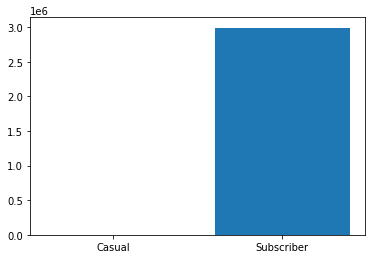

In [47]:
plt.bar(trip_per_user.index, trip_per_user.values)

<BarContainer object of 7 artists>

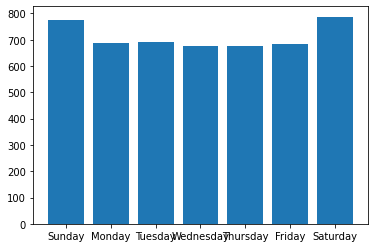

In [48]:
plt.bar(dur_per_day.index,dur_per_day.values)

The longest trip duration is done on Saturday and Sunday

Preliminary findings:

1. Casual users have an average trip duration of 997 seconds or approximately 17 minutes, which is 5 minutes longer than the average trip duration of annual members, which is only 12 minutes.

2. Overall, trips are predominantly taken by annual members.

**Exporting data into csv file for visualization in Tableau**

In [49]:
dataset_2017.to_csv("Divvy_dataset_2017.csv", index=False)

## Share

Link to Tableau Public (Interactive) Visualization:

https://public.tableau.com/views/StudiKasus1-GoogleDataAnalyticsEngVer_/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

![Overall_Users_Viz](./Visualization_English_Version/Overall_Users_Viz.png)

Attached above is a screenshot of the overall user visualization created in Tableau Public.

From the visualization above, it can be observed that the majority of users are annual members (Subscribers) and are predominantly male users born between the years 1980-2000 (approximately 17-37 years old). Additionally, it is evident that the most frequently used station is "Canal St & Adams St".

![Casual_Users_Viz](./Visualization_English_Version/Casual_Users_Viz.png)

Next is a screenshot of the casual user visualization.

From the visualization above, it can be observed that casual users did not utilize the service in Q4 and are more active on weekends. Furthermore, the majority of casual users are males, particularly in the age range of 1970-1980 (37-47 years old). Additionally, the most frequently used station by casual users as a starting point is "Kingsbury St & Kinzie St".

![Annual_Members_Viz](./Visualization_English_Version/Annual_Members_Viz.png)

Above is the attached screenshot of the visualization of subscribers.

From the visualization above, it can be observed that the average trips by subscribers are more frequent on weekends (Saturday and Sunday). Additionally, the majority of subscribers are males in the age range of 1980-2000 (17-37 years old). The most commonly used starting station by subscribers is "Canal St & Adams St".

**Insights and Findings Related to the Business Problem**

From the data processing, analysis, and visualizations above, several insights can be drawn regarding the differences in usage patterns between subscribers and casual riders:

1. Casual riders do not use the service as frequently during Q4 (assumed to be around the colder season) and are more active during Q3. On the other hand, subscribers continue to use the service in Q4, although with slightly shorter durations compared to Q2 and Q3.

2. Casual riders have a higher proportion of male users and tend to be older compared to subscribers.

3. Casual riders predominantly start their trips from the "Kingsbury St & Kinzie St" station, while subscribers predominantly start from the "Canal St & Adams St" station.

## Act

**According to the analysis, what's the final conclusion?**


Based on the analysis, several conclusions can be drawn:

1. Casual riders are less active during Q4.

2. Casual riders are predominantly male and tend to be older (37-47 years old).

3. Casual riders predominantly start their trips from the "Kingsbury St. & Kinzie St." station.

**What are the next steps that can be taken in accordance to these findings?**

Based on these findings, there are several steps that the marketing team can take to effectively promote and convert casual riders into annual members, including:

1. Based on the insight that casual riders are less active during Q4 when temperatures tend to be colder, the marketing team can focus on promoting more heavily during Q2 and Q3. Additionally, they can offer summer promotions (as summer in the United States typically falls between Q2 and Q3), providing additional benefits for casual riders who become annual members during the summer season.

2. Considering that casual riders are predominantly older males (37-47 years old), the marketing team can implement promotions that specifically target this demographic, such as senior discounts or bundled purchases with grooming kits (e.g., razors and creams).

3. Since casual riders predominantly start their trips from the "Kingsbury St. & Kinzie St." station, the marketing team can allocate more resources in that area. They can also offer promotions related to the local environment, such as providing an annual membership discount if more than 50% of a user's trips originate from "Kingsbury St. & Kinzie St."

4. Instead of utilizing each individual piece of information separately, the marketing team can also combine and collaborate on these insights to create more effective promotions. For example, offering an annual membership discount if more than 50% of a user's trips start from "Kingsbury St. & Kinzie St." and are taken during weekends in Q2 or Q3. This approach makes casual riders feel like the promotion package is specifically tailored to their needs or habits. Combined with bundling packages, which tend to attract people by providing additional benefits at a slightly higher cost, this approach can be highly enticing.

## Closing Statement

In working on this case study, the author successfully gained:

1. Knowledge and experience in formulating a business question/task based on business needs.

2. Experience in analyzing data from real-world business scenarios.

3. Experience in utilizing findings and insights to address business questions.

4. Knowledge and proficiency in using analysis tools such as Python and Tableau.

Thank you to all parties involved (Google, Baparekraf, etc.) for their contributions that made this case study possible. May the readers who discover and review this case study until the end gain new knowledge and insights in data analysis.

*Some of the translations in this notebook was done with ChatGPT 3.5*